In [1]:
import numpy as np
import scipy
import torch

In [2]:
res = scipy.io.loadmat("SingleBunchAtPENT_withLaserHeater.mat", simplify_cells=True)

In [3]:
beam = np.array(res["beam"]["Bunch"]["x"]).T

In [15]:
beam[:,-1] < 1.0

tensor([False, False, False,  ..., False, False, False])

In [16]:
beam1 = beam[beam[:,-1] > 1.0]

In [24]:
beam1[:,-1] = (beam1[:,-1] - 10.0)/10.0

In [27]:
from bmadx import Particle

beam = torch.tensor(beam)
p = Particle(
    *beam1[::10].T,
    p0c = 10,
    s = 0,
    mc2 = 0.511
)

/tmp/ipykernel_209081/2492838816.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beam = torch.tensor(beam)


(<Figure size 1200x1200 with 36 Axes>,
 array([[<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
        [<Axes: ylabel='px (mrad)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='y (mm)'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: ylabel='py (mrad)'>, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >, <Axes: >],
        [<Axes: ylabel='z (mm)'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
         <Axes: >],
        [<Axes: xlabel='x (mm)', ylabel='pz (%)'>,
         <Axes: xlabel='px (mrad)'>, <Axes: xlabel='y (mm)'>,
         <Axes: xlabel='py (mrad)'>, <Axes: xlabel='z (mm)'>,
         <Axes: xlabel='pz (%)'>]], dtype=object))

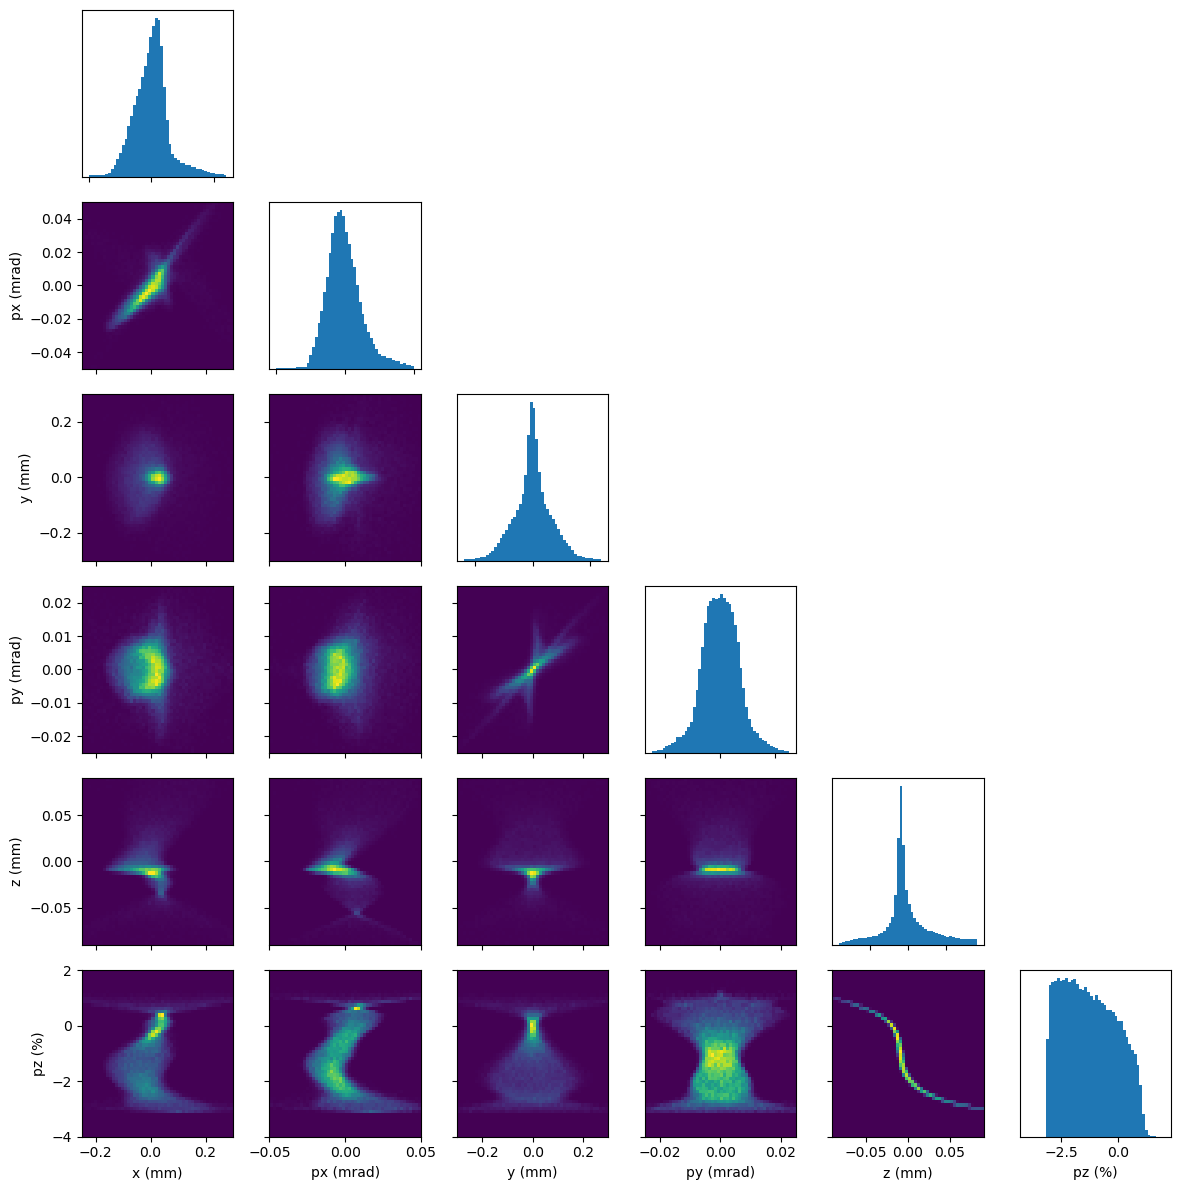

In [39]:
from bmadx.plot import plot_projections
lims = np.array([
    [-2.5e-4,3e-4],
    [-0.5e-4,0.5e-4],
    [-3e-4,3e-4],
    [-25e-6,25e-6],
    [-0.9e-4, 0.9e-4],
    [-4e-2,2e-2]
])
plot_projections(
    p,
    custom_lims=lims
)


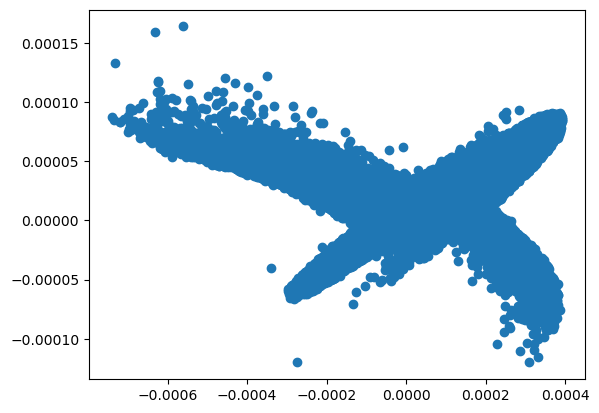

In [4]:
import matplotlib.pyplot as plt
plt.scatter(beam[:,0],beam[:,1])

In [8]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.interfaces.lucretia import lucretia_to_data
lucretia_to_data("SingleBunchAtPENT_withLaserHeater.mat")


KeyError: 'bstore'

In [10]:
part = ParticleGroup(data=beam.T)

AttributeError: 'numpy.ndarray' object has no attribute 'items'